## PORTUGUESE FINANCIAL INSTITUTION

- Term Deposits are a major source of income for a bank.
- A term deposit is a cash investment held at a financial institution.
- Telephonic marketing campaigns still remain one of the most effective way to reach out to people.
- Telephonic marketing require huge investment as large call centers are hired to actually execute these campaigns.
- Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

### Objective
- The goal is to predict if the client will subscribe to a term deposit (variable y).

### Data Understanding

- The data is related to the direct marketing campaigns of a Portuguese banking institution.
- The marketing campaigns were based on phone calls.
- Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not.

### DATA DICTIONARY
- 1 - age (numeric)
- 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
- 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- 4 - education (categorical: "unknown","secondary","primary","tertiary")
- 5 - default: has credit in default? (binary: "yes","no")
- 6 - balance: average yearly balance, in euros (numeric)
- 7 - housing: has housing loan? (binary: "yes","no")
- 8 - loan: has personal loan? (binary: "yes","no")
- 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
- 10 - day: last contact day of the month (numeric)
- 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- 12 - duration: last contact duration, in seconds (numeric)
- 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- 15 - previous: number of contacts performed before this campaign and for this client (numeric)
- 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
- 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df=pd.read_excel('TermDeposit')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

45211 rows and 17 columns are there.

In [4]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [5]:
categorical_col=list(df.select_dtypes(include='object'))
categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- As we can see in info, most of the columns are categorical in nature and few of them are numerical in inature. 

In [7]:
# Finding Missing Value in the Dataset
data_total = df.isnull().sum().sort_values(ascending=False)

# Percentage of missing value in the dataset
percentage = (((df.isnull().sum()/df.shape[0]))*100).sort_values(ascending=False)

# Table
table = pd.concat([data_total,percentage],keys=['Total','Percentage'],axis=1)
table

,Total,Percentage
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
contact,0,0.0
job,0,0.0


- This dataset doesnot have any null values and missing values. 

In [8]:
## Finding the duplicate instances
data_dup = df[df.duplicated(keep="first")]
data_dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


- This dataset doesnot have any duplicated values.

In [9]:
# By using describe() for numerical columns,we can get five point summary of each columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- Age

  - Mean - 40.9
  - Standard Dev - 10.6
  - first quantile - 33
  - Median - 39
  - As mean is higher than median Age is slightly rightly skewed
    
- balance

  - Mean - 1362.2
  - Standard Dev - 3044.7
  - first quantile - 72
  - Median - 448
  - Balance is highly rightly skewed

- day

  - Mean - 15.8
  - Standard Dev - 8.3
  - first quantile - 8
  - Median - 16
simillarlly we can find for other columns as well.

In [10]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


### Univariate Analysis

In [11]:
df['y'].value_counts(normalize=True)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

- From this we can see that 88% of customers didnot take the term deposit.

In [12]:
df['y'].value_counts()['no']*100/45211

88.30151954170445

In [13]:
df['y'].value_counts()['yes']*100/45211

11.698480458295547

In [14]:
df['y']=df['y'].map({'no':0,'yes':1})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


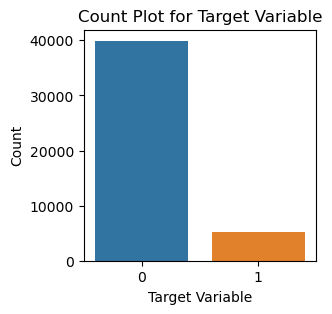

In [15]:
plt.figure(figsize=(3,3))
sns.countplot(x='y',data=df)
plt.title('Count Plot for Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

- Hence we can say this dataset is an imbalanced one

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


C:\Users\veeru\AppData\Local\Temp\ipykernel_11908\134212981.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm",annot=True)


<Axes: >

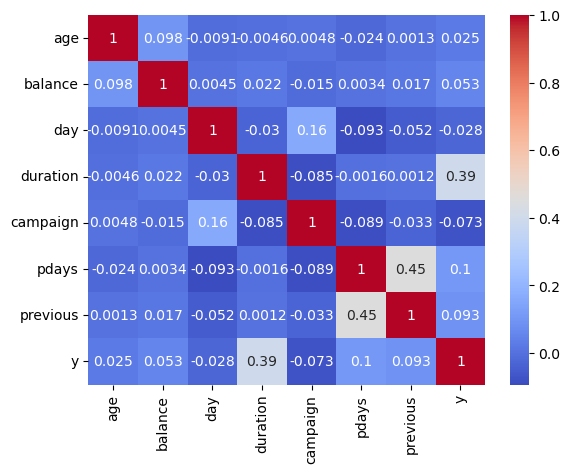

In [17]:
sns.heatmap(df.corr(), cmap="coolwarm",annot=True)

- We can see there is no strong correlation between the numerical columns. 

<Axes: >

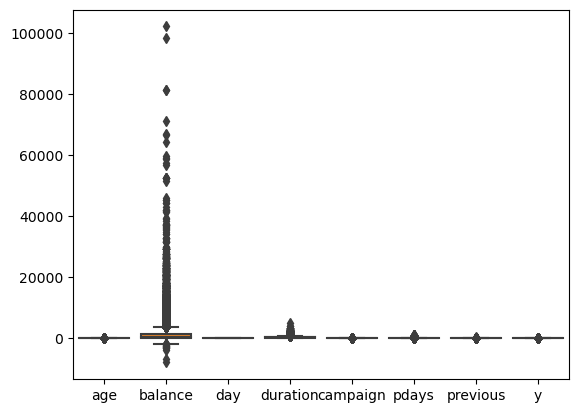

In [18]:
sns.boxplot(data=df)

## Bivarient Analysis

In [19]:
pd.crosstab(df.job,df.y)

y,0,1
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


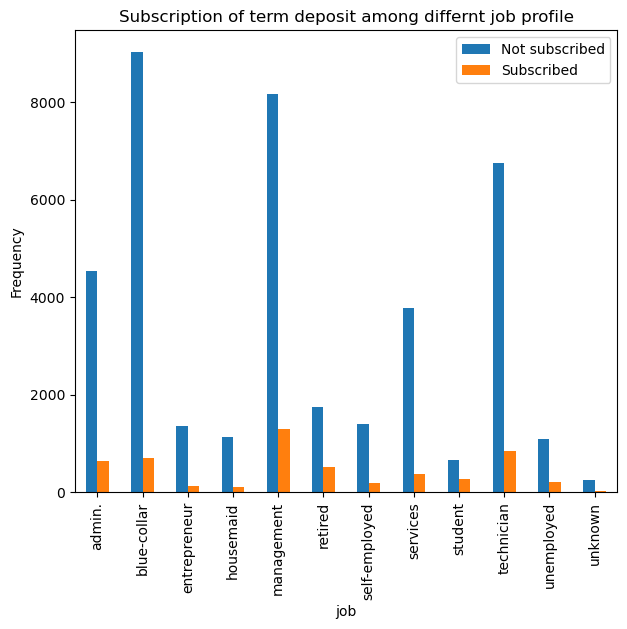

In [20]:
pd.crosstab(df.job,df.y).plot(kind="bar",figsize=(7,6))
plt.title('Subscription of term deposit among differnt job profile')
plt.xlabel('job')
plt.ylabel('Frequency')
plt.legend(["Not subscribed","Subscribed"])
plt.show()

- It can be observed that the customers who have a job of management have the highest rate of subscribing to a term deposit and
blue color people have highest rate in terms of non subscribing to a term deposit.

In [21]:
pd.crosstab(df.marital,df.y)

y,0,1
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


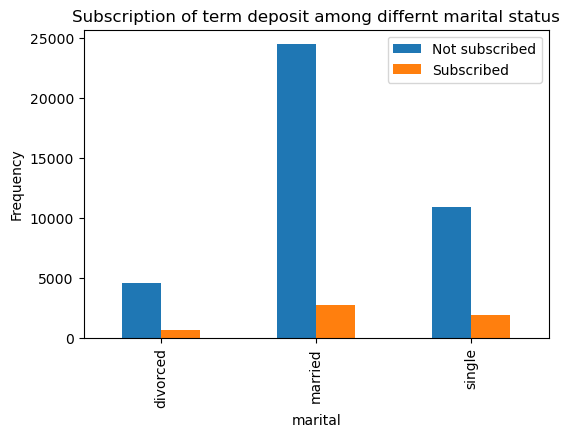

In [22]:
pd.crosstab(df.marital,df.y).plot(kind="bar",figsize=(6,4))
plt.title('Subscription of term deposit among differnt marital status')
plt.xlabel('marital')
plt.ylabel('Frequency')
plt.legend(["Not subscribed","Subscribed"])
plt.show()

- The number of subscribers is highest for married customers, closely followed by customers who are single and remarkably less for divorced customers.

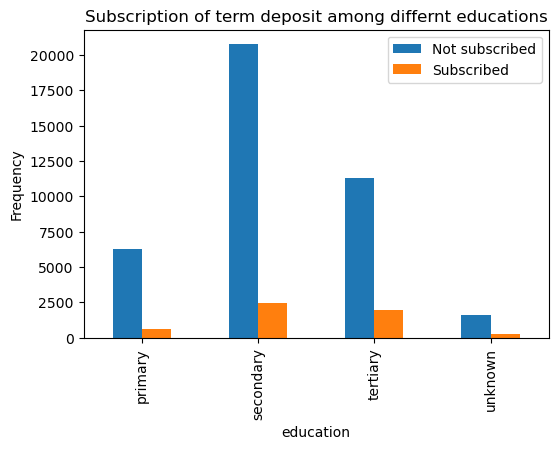

In [23]:
pd.crosstab(df.education,df.y).plot(kind="bar",figsize=(6,4))
plt.title('Subscription of term deposit among differnt educations')
plt.xlabel('education')
plt.ylabel('Frequency')
plt.legend(["Not subscribed","Subscribed"])
plt.show()

- Customers who possess secondary followd by tertiary education have the highest rate of subscribing to a term deposit.

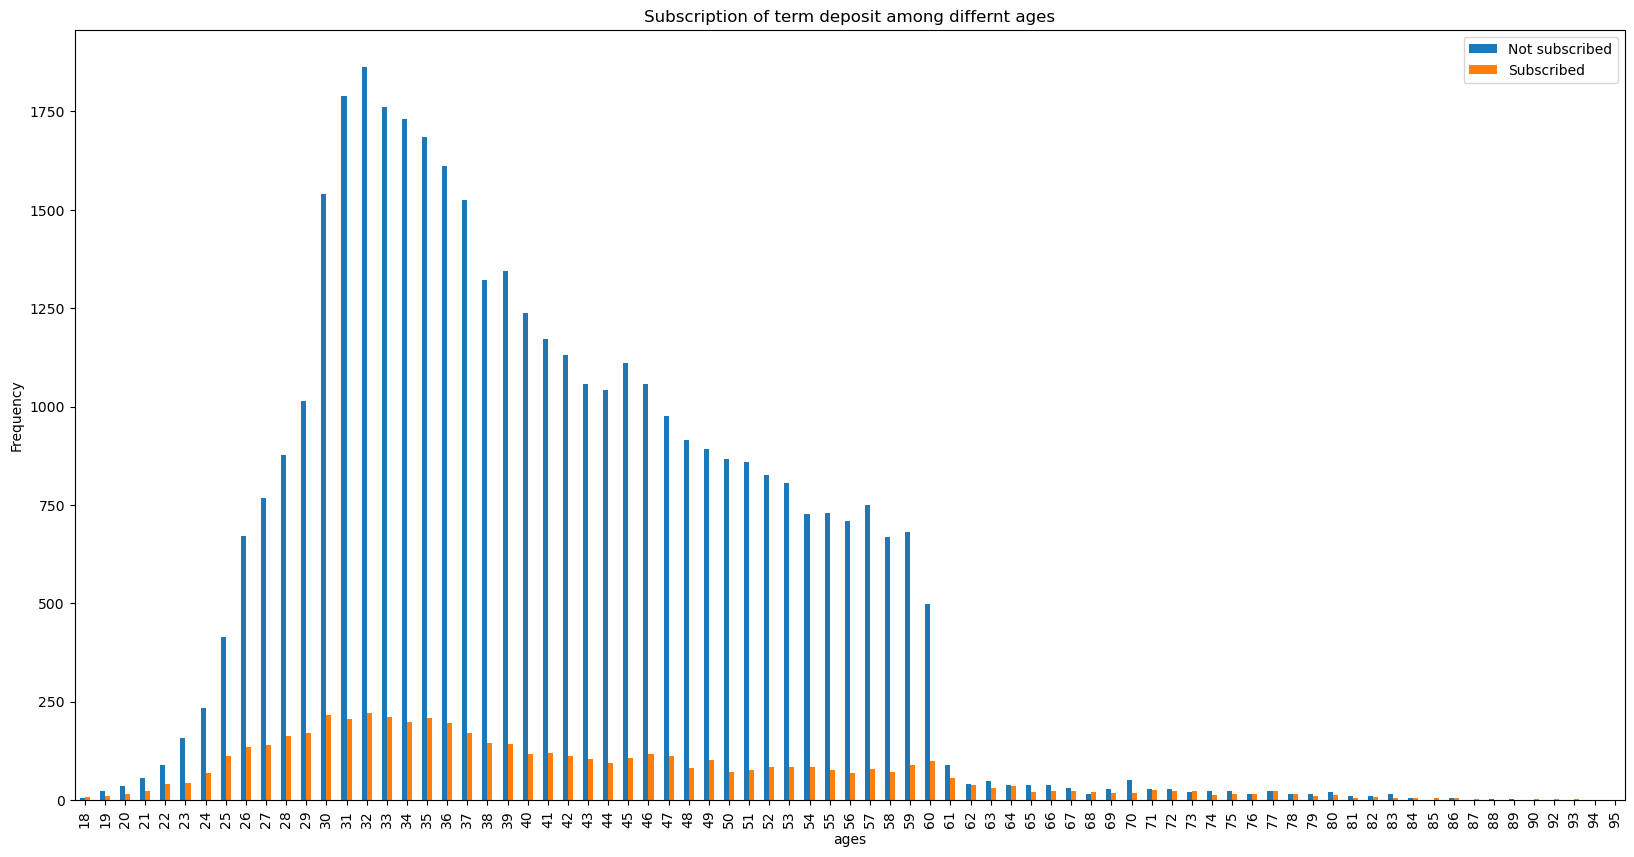

In [24]:
pd.crosstab(df.age,df.y).plot(kind="bar",figsize=(20,10))
plt.title('Subscription of term deposit among differnt ages')
plt.xlabel('ages')
plt.ylabel('Frequency')
plt.legend(["Not subscribed","Subscribed"])
plt.show()

- The age group people of 30 to 36 have highest rate of subscription.

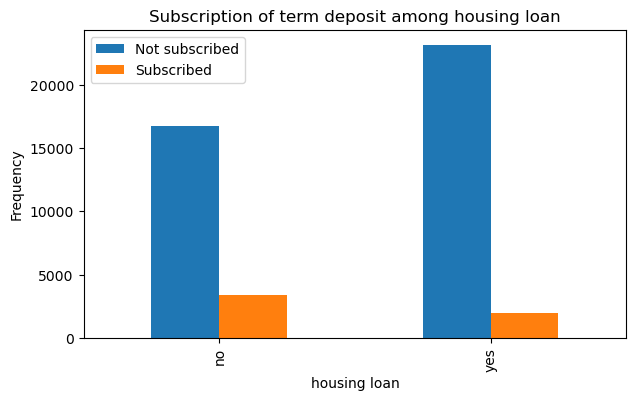

In [25]:
pd.crosstab(df.housing,df.y).plot(kind="bar",figsize=(7,4))
plt.title('Subscription of term deposit among housing loan')
plt.xlabel('housing loan')
plt.ylabel('Frequency')
plt.legend(["Not subscribed","Subscribed"])
plt.show()

- Majority of customers who have subscribed to a term deposit, have no housing loan.

In [26]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

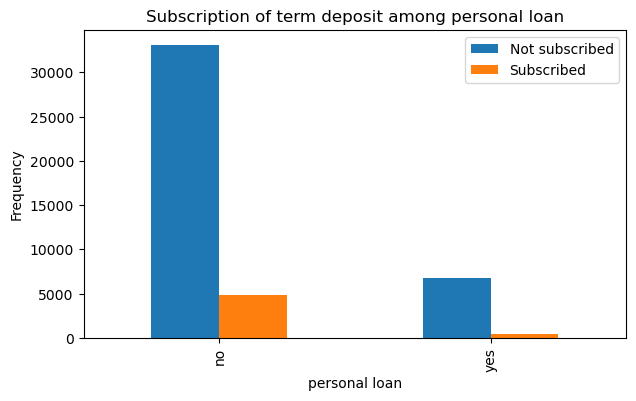

In [27]:
pd.crosstab(df.loan,df.y).plot(kind="bar",figsize=(7,4))
plt.title('Subscription of term deposit among personal loan')
plt.xlabel('personal loan')
plt.ylabel('Frequency')
plt.legend(["Not subscribed","Subscribed"])
plt.show()

- Mostly customers with no personal loan have subscribed to a term deposit.

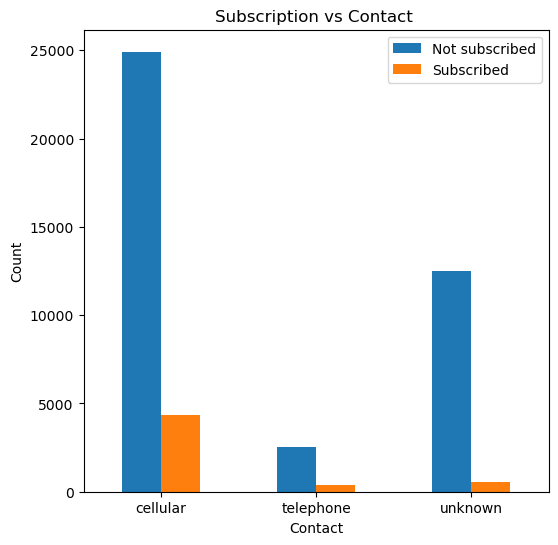

In [28]:
pd.crosstab(df.contact,df.y).plot(kind="bar",figsize=(6,6))
plt.title("Subscription vs Contact ")
plt.ylabel("Count")
plt.xlabel("Contact")
plt.legend(["Not subscribed","Subscribed"])
plt.xticks(rotation=0)
plt.show()

- Majority of customers who were contacted through cellular phones have subscribed to a term deposit.

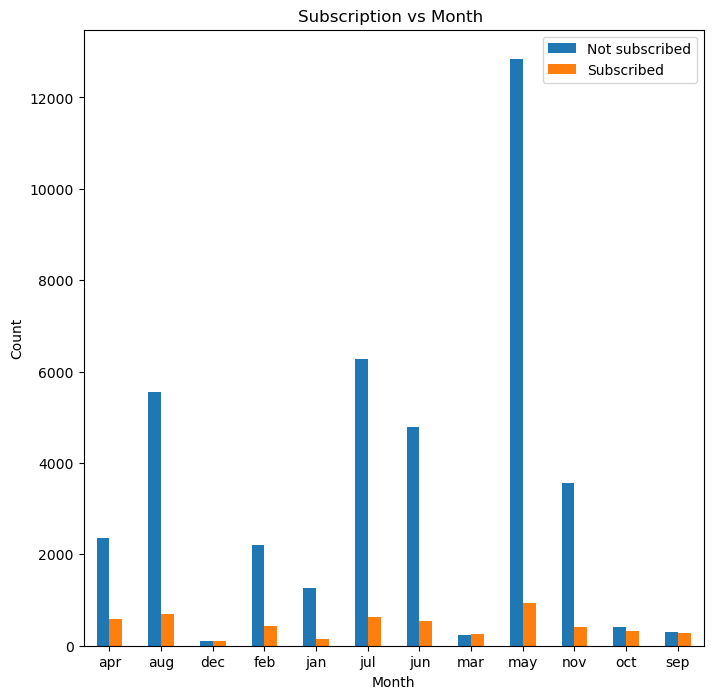

In [29]:
pd.crosstab(df.month,df.y).plot(kind="bar",stacked=False,figsize=(8,8))
plt.title("Subscription vs Month ")
plt.ylabel("Count")
plt.xlabel("Month")
plt.legend(["Not subscribed","Subscribed"])
plt.xticks(rotation=0)
plt.show()

- Maximum subscriptions have been made in may month.

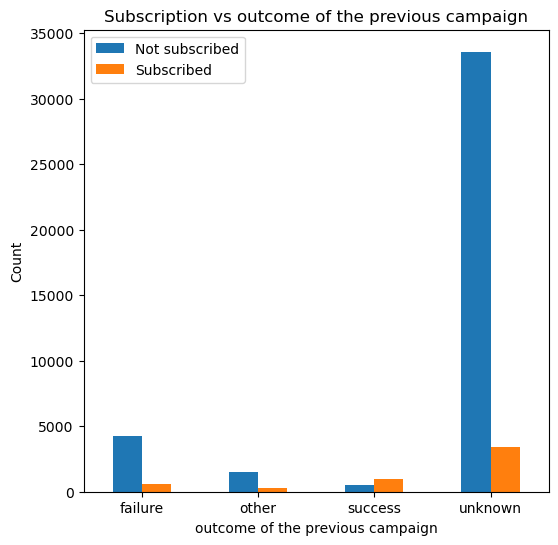

In [30]:
pd.crosstab(df.poutcome,df.y).plot(kind="bar",stacked=False,figsize=(6,6))
plt.title("Subscription vs outcome of the previous campaign")
plt.ylabel("Count")
plt.xlabel("outcome of the previous campaign")
plt.legend(["Not subscribed","Subscribed"])
plt.xticks(rotation=0)
plt.show()


- Customers with no records in the previous campaign have the highest rate of subscribing to a term deposit. Customers for whom the previous campaign resulted in success have subscribed to the deposit more in comparison with customers for whom it resulted in a failure.

C:\Users\veeru\AppData\Local\Temp\ipykernel_11908\2376266123.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<Axes: xlabel='age', ylabel='Density'>

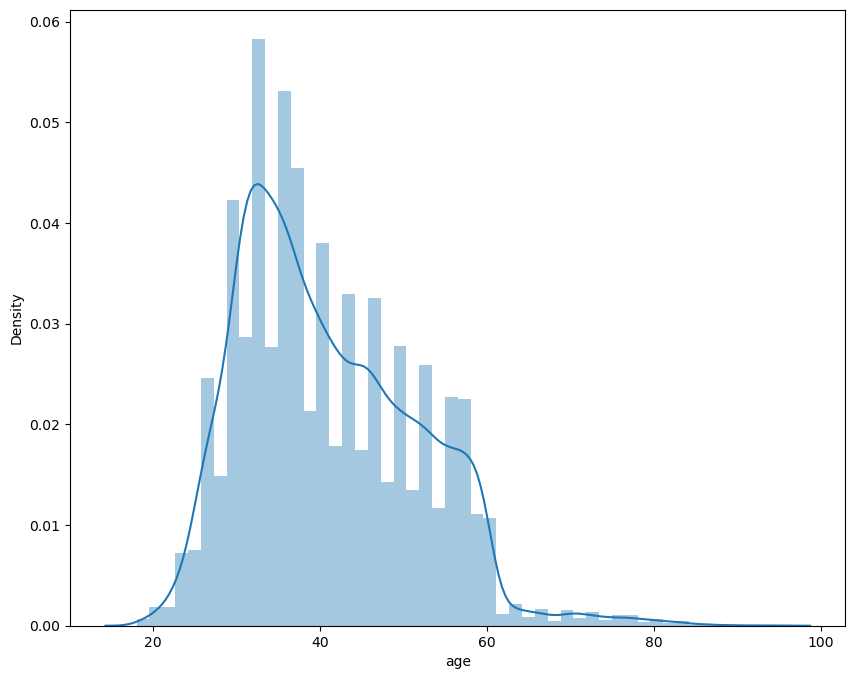

In [31]:
plt.figure(figsize=(10,8))
sns.distplot(df["age"])

- From the plot it can be observed most of the customers are in the age range of 30-40

<Axes: >

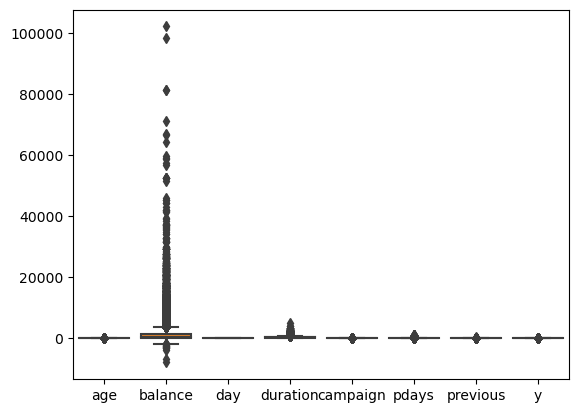

In [32]:
sns.boxplot(data=df)

- There are outliers in the quantitative varibales.Maximum outliers are there in balance.

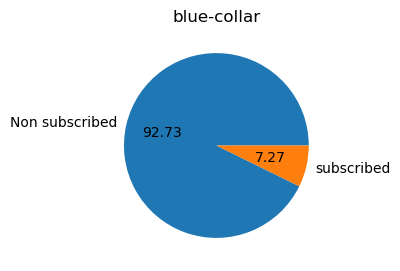

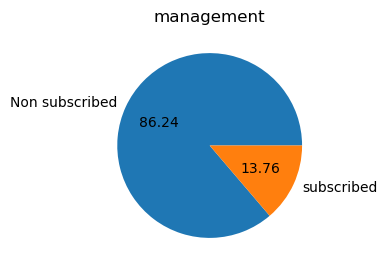

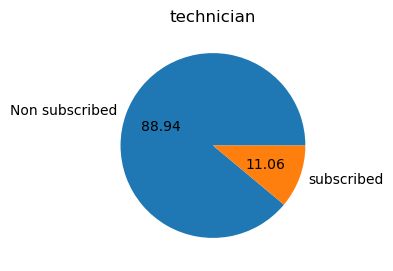

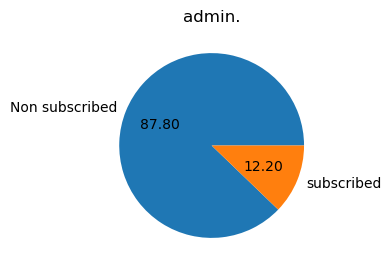

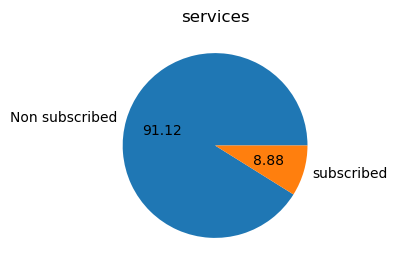

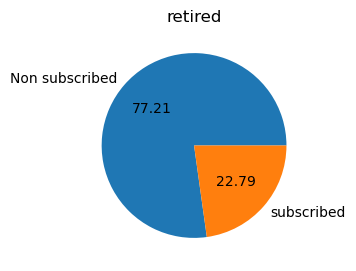

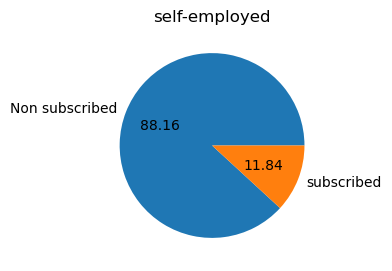

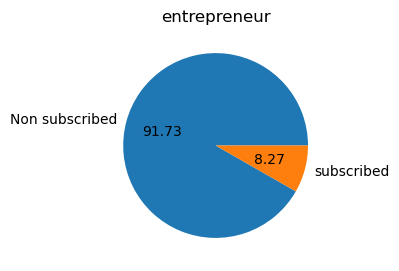

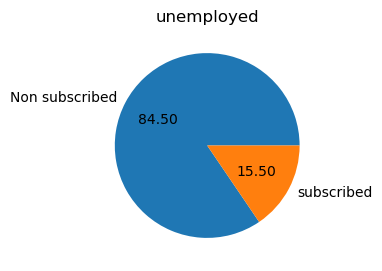

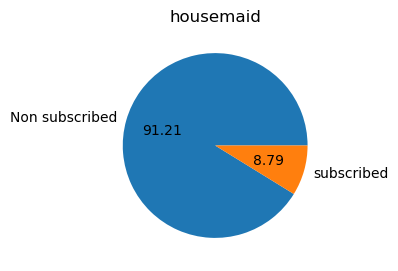

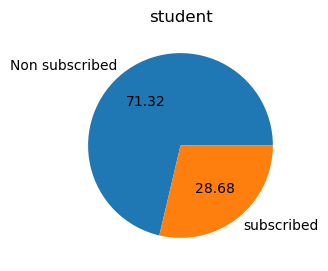

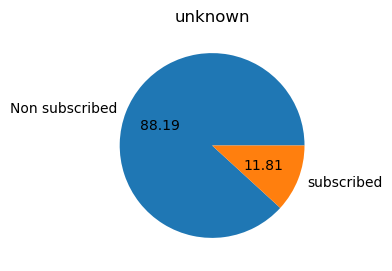

In [33]:
c=df['job'].value_counts().index
for i in range(len(c)):
    b=df.groupby(by='job')
    y=b.get_group(c[i])['y'].value_counts()
    plt.figure(figsize=(3,3))
    plt.plot(i)
    plt.pie(labels=['Non subscribed','subscribed'],x=y.values,autopct='%.2f')
    plt.title(f'{c[i]}')
    plt.show()

In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [35]:
len(df[(df['day']==5) & (df['y']==1)])

215

In [36]:
grouped_df = df.groupby('marital')
grouped_df.get_group('single')['y'].value_counts()

0    10878
1     1912
Name: y, dtype: int64

In [37]:
grouped_df = df.groupby('job')
grouped_df.get_group('entrepreneur')['y'].value_counts()

0    1364
1     123
Name: y, dtype: int64

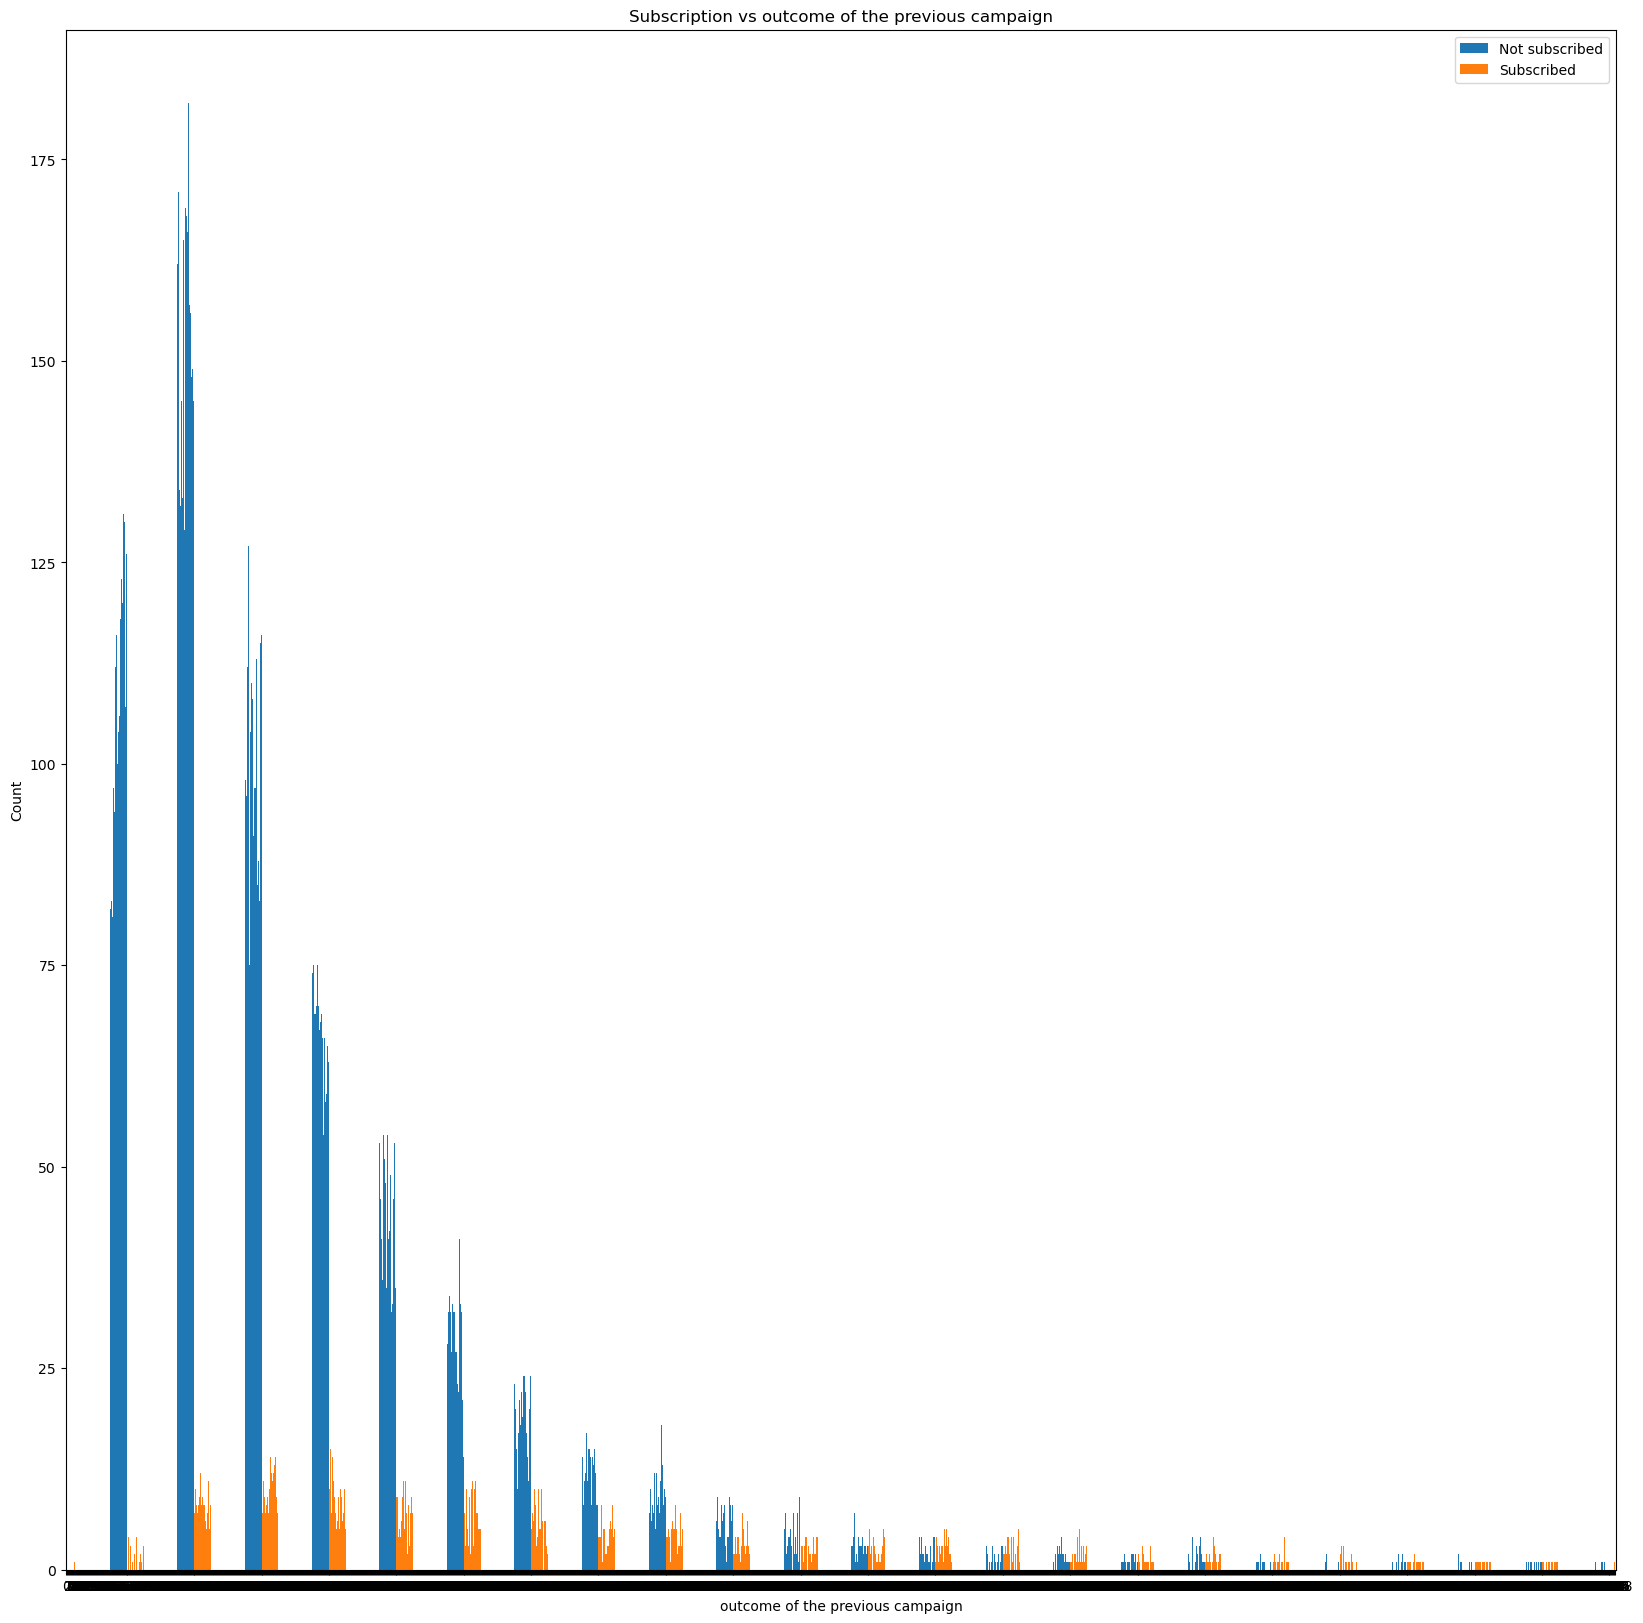

In [38]:
pd.crosstab(df.duration,df.y).plot(kind="bar",stacked=False,figsize=(20,20))
plt.title("Subscription vs outcome of the previous campaign")
plt.ylabel("Count")
plt.xlabel("outcome of the previous campaign")
plt.legend(["Not subscribed","Subscribed"])
plt.xticks(rotation=0)
plt.show()

1837
1965


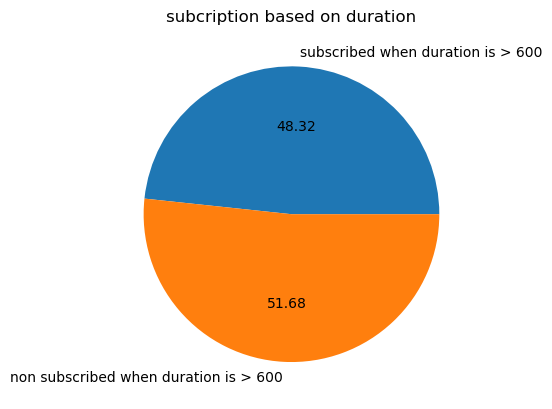

In [39]:
print(len(df[(df['duration']>=600) & (df['y']==1)]))
print(len(df[(df['duration']>=600) & (df['y']==0)]))
plt.pie(labels=['subscribed when duration is > 600','non subscribed when duration is > 600'], 
        x=[1837,1965],autopct='%0.2f')
plt.title('subcription based on duration')
plt.show()

- There is 48.32% chance that customers talked more take subcription and 51.68% chance that customers do not take subcription.

3456
37965


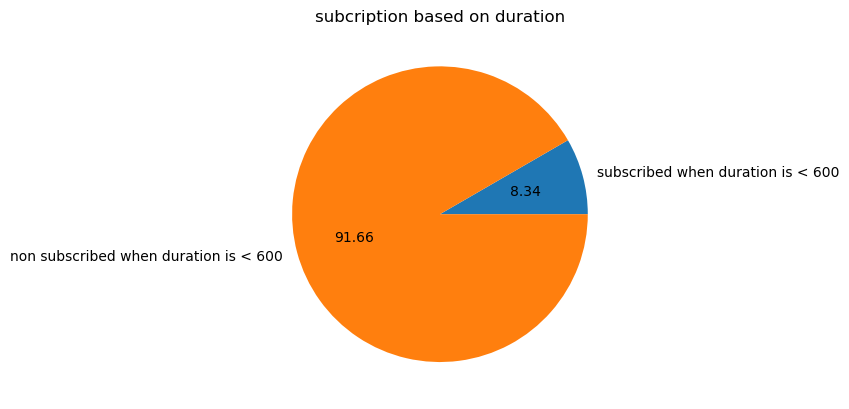

In [40]:
print(len(df[(df['duration']<=600) & (df['y']==1)]))
print(len(df[(df['duration']<=600) & (df['y']==0)]))
plt.pie(labels=['subscribed when duration is < 600','non subscribed when duration is < 600'], 
        x=[3456,37965],autopct='%0.2f')
plt.title('subcription based on duration')
plt.show()

- 8.34% of customers subscribed even though they talked so little.

<Axes: xlabel='day', ylabel='count'>

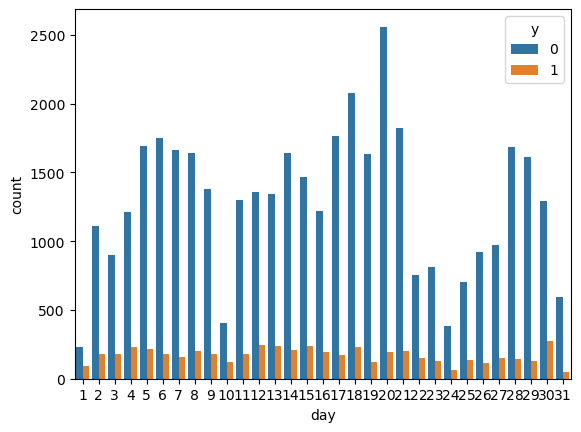

In [41]:
sns.countplot(x='day',hue='y',data=df)

<Axes: xlabel='month', ylabel='count'>

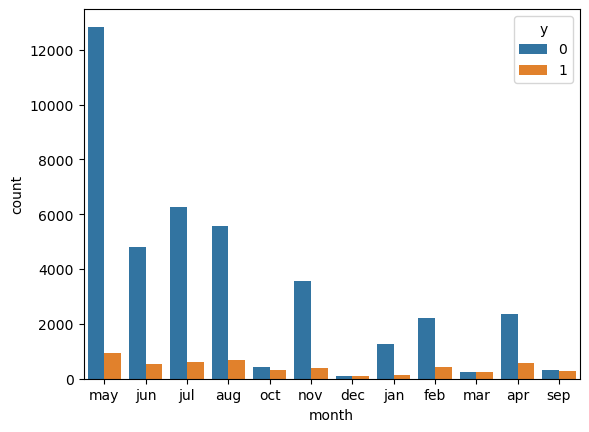

In [42]:
sns.countplot(x='month',hue='y',data=df)

<Axes: xlabel='age', ylabel='Count'>

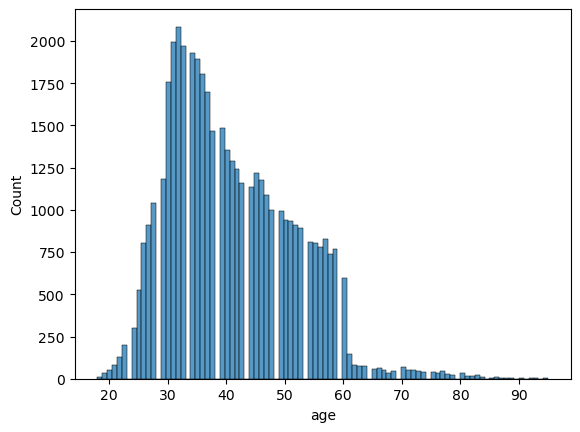

In [43]:
sns.histplot(x='age',data=df)

<Axes: xlabel='duration', ylabel='Count'>

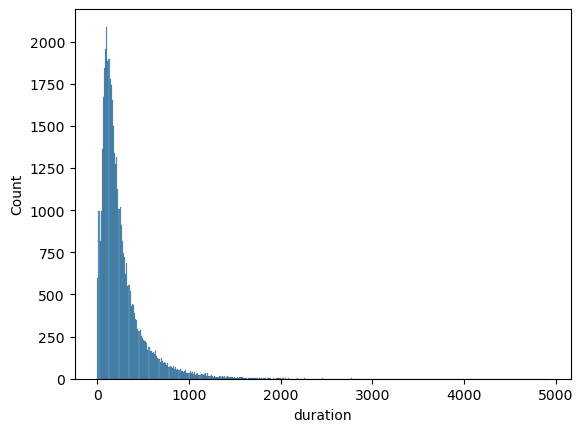

In [44]:
sns.histplot(x='duration',data=df)

<Axes: xlabel='age'>

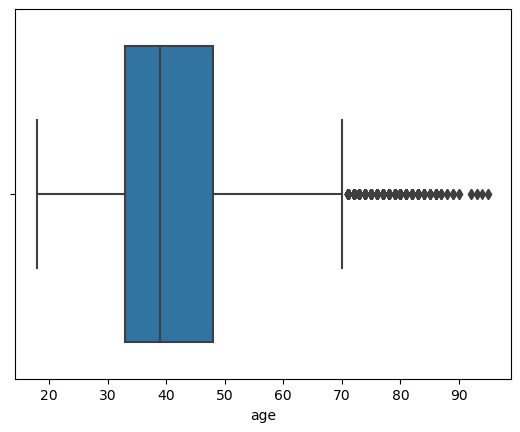

In [45]:
sns.boxplot(x='age',data=df)

- By Histogram
- Data is rightly skewed after visualizing the histogram and mean value is greater than median so it be becomes rightly skewed.

- By Boxplot
- Box plot is unequal in size and whisker is larger towwards right so we can say data is rightly skewed

In [46]:
df.skew()

C:\Users\veeru\AppData\Local\Temp\ipykernel_11908\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
y            2.383480
dtype: float64

- The variables which are greater than 1 are rightly skewed.

In [47]:
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(df['age'], df['duration'])

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson Correlation Coefficient: -0.004648428470616233
P-value: 0.32297259684262797


In [48]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['job'], df['y'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)

Chi-square Statistic: 836.1054877471965
P-value: 3.337121944935502e-172
Degrees of Freedom: 11


## Data Preprocessing

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [50]:
# There are no missiing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [51]:
# IQR method, to check for outliers.

q1=df['balance'].quantile(0.25)
q3=df['balance'].quantile(0.75)

iqr=q3-q1
posout=q3+1.5*iqr
negout=q1-1.5*iqr
outliers=df[(df['balance'] >posout) | (df['balance'] <negout)]
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,0
65,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,0
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,0
70,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,0
186,40,services,divorced,unknown,no,4384,yes,no,unknown,5,may,315,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45164,35,services,married,tertiary,no,4655,no,no,cellular,9,nov,111,2,-1,0,unknown,0
45181,46,blue-collar,married,secondary,no,6879,no,no,cellular,15,nov,74,2,118,3,failure,0
45185,60,services,married,tertiary,no,4256,yes,no,cellular,16,nov,200,1,92,4,success,1
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,1


- Since data is rightly skewed we use IQR method to find out outliers.
- Outliers are there in this data set.

In [52]:
outliers.shape

(4729, 17)

In [53]:
df_no_outliers = df[(df['balance'] >= negout) & (df['balance'] <= posout)]
df_no_outliers.shape

(40482, 17)

In [54]:
df.shape

(45211, 17)

In [55]:
df1=df.copy()
df1.shape

(45211, 17)

In [56]:
from sklearn.preprocessing import LabelEncoder
cols=list(df1.select_dtypes(include='object'))
# Encode labels of object dtype multiple columns at once 
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# ML models

- By using Label Encoder method,different models performances.

### Logistic Regression

In [63]:
x=df1.drop('y',axis=1)
z=df1.y

In [65]:
z.value_counts()

0    39922
1     5289
Name: y, dtype: int64

- Since target variable class is imbalanced , first we need to balance that by using 'Over sampling' method.

In [67]:
#smote- synthetic minority over sampling techq
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=11)
x_over, y_over = sm.fit_resample(x,z)

In [68]:
print(x_over.shape)
print(y_over.shape)

(79844, 16)
(79844,)


In [69]:
y_over.value_counts()

0    39922
1    39922
Name: y, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,train_size=0.8,random_state=7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(63875, 16)
(15969, 16)
(63875,)
(15969,)


In [71]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x_train=rs.fit_transform(x_train)
x_test=rs.transform(x_test)

In [73]:
#Instantiating and fitting the model to training Dataset

from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

In [81]:
y_pred_train=log_reg.predict(x_train)

In [83]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     31996
           1       0.84      0.88      0.86     31879

    accuracy                           0.85     63875
   macro avg       0.85      0.85      0.85     63875
weighted avg       0.85      0.85      0.85     63875



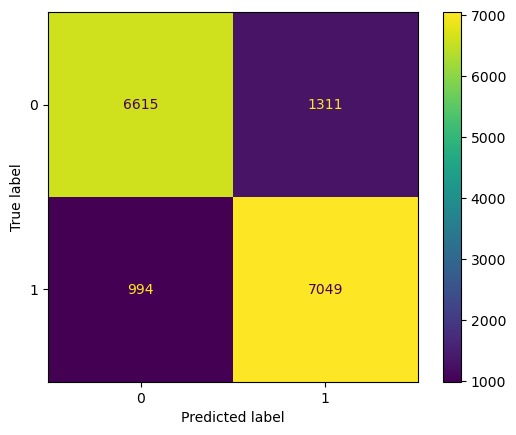

In [75]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

conf_matrix=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7926
           1       0.84      0.88      0.86      8043

    accuracy                           0.86     15969
   macro avg       0.86      0.86      0.86     15969
weighted avg       0.86      0.86      0.86     15969



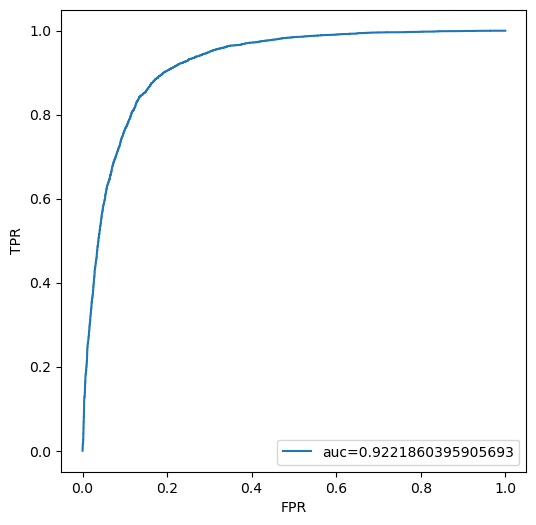

In [80]:
from sklearn import metrics
y_pred_test_prob=log_reg.predict_proba(x_test)[::,1]
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_test_prob)
auc=metrics.roc_auc_score(y_test,y_pred_test_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

fit_dt = DecisionTreeClassifier(random_state=17)

param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

cv_dt = GridSearchCV(fit_dt, cv = 15,
                     param_grid=param_dist)

cv_dt.fit(x_train, y_train)

print(cv_dt.best_score_)

y_pred=cv_dt.predict(x_test)

0.8482976820322067


In [85]:
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 14}


In [86]:
fit_dt.set_params(criterion = 'gini',
                max_depth =8, max_leaf_nodes=14)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=14, random_state=17)

In [89]:
fit_dt.fit(x_train, y_train)
y_pred = fit_dt.predict(x_test)

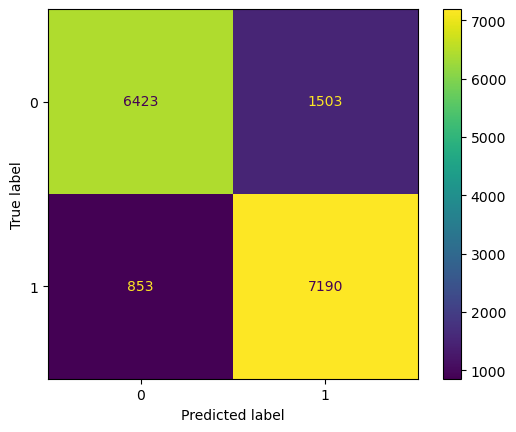

In [90]:
conf_matrix=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      7926
           1       0.83      0.89      0.86      8043

    accuracy                           0.85     15969
   macro avg       0.85      0.85      0.85     15969
weighted avg       0.85      0.85      0.85     15969



In [92]:
y_pred_train = fit_dt.predict(x_train)

In [93]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     31996
           1       0.84      0.88      0.86     31879

    accuracy                           0.85     63875
   macro avg       0.85      0.85      0.85     63875
weighted avg       0.85      0.85      0.85     63875



In [97]:
#Supress the warnings
import warnings
warnings.filterwarnings('ignore')


from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_test_predict = classifier.predict(x_test)
y_train_predict = classifier.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.90      0.54      0.68      7926
           1       0.68      0.94      0.79      8043

    accuracy                           0.74     15969
   macro avg       0.79      0.74      0.73     15969
weighted avg       0.79      0.74      0.73     15969

              precision    recall  f1-score   support

           0       0.90      0.54      0.67     31996
           1       0.67      0.94      0.78     31879

    accuracy                           0.74     63875
   macro avg       0.78      0.74      0.73     63875
weighted avg       0.78      0.74      0.73     63875



In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor

fit_rf = RandomForestClassifier(random_state=3)

In [104]:
# Providing the different values of hyperparameters
param_dist = {'max_depth': [2, 3, 4,6,8],
              'max_features': ['auto', 'sqrt'],
              'criterion': ['gini', 'entropy'],
             'oob_score' : [True, False],
             'n_estimators':[10,15,20,25,30]}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv =5,
                     param_grid=param_dist)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)   #to get best Hyperparameters

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 25, 'oob_score': True}


In [105]:
y_pred = cv_rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      7926
           1       0.86      0.91      0.88      8043

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88      0.88      0.88     15969



In [106]:
y_pred_train=cv_rf.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     31996
           1       0.86      0.92      0.89     31879

    accuracy                           0.88     63875
   macro avg       0.89      0.88      0.88     63875
weighted avg       0.89      0.88      0.88     63875



In [111]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(fit_rf,x_over,y_over,cv=5)
print(scores)
scores.mean()

[0.84100445 0.86548939 0.85152483 0.72152295 0.63633517]


0.7831753564427371

In [128]:
# K nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
fit_knn=KNeighborsClassifier()

In [132]:
parm_dist={'n_neighbors':[5,7,9,11,13,15,17,19,21,23,25,27,29],
          'metric':['minkowski','manhattan']}

In [134]:
cv_knn=GridSearchCV(fit_knn,cv=20,param_grid=parm_dist)
cv_knn.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29]})

In [135]:
cv_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [137]:
y_pred=cv_knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7926
           1       0.89      0.95      0.92      8043

    accuracy                           0.91     15969
   macro avg       0.92      0.91      0.91     15969
weighted avg       0.92      0.91      0.91     15969



- By using "One Hot Encoding" method, different models performances have showen below.

In [143]:
df2=df.copy()

In [146]:
cols=list(df2.select_dtypes(include='object'))

In [148]:
for i in cols:
    df2[i]=df2[i].astype('category')
    df2[i]=df2[i].cat.codes
df2=pd.get_dummies(df2,columns=cols,drop_first=True)
df2.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_1,job_2,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_1,poutcome_2,poutcome_3
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [152]:
x=df2.drop('y',axis=1)
z=df2.y

In [153]:
print(x.shape)
print(z.shape)

(45211, 42)
(45211,)


In [154]:
#smote- synthetic minority over sampling techq
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=11)
x_over, y_over = sm.fit_resample(x,z)

In [155]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,train_size=0.8,random_state=7)

In [156]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x_train=rs.fit_transform(x_train)
x_test=rs.transform(x_test)

In [157]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7926
           1       0.94      0.92      0.93      8043

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969



In [162]:
y_pred_train=log_reg.predict(x_train)

In [163]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     31996
           1       0.94      0.92      0.93     31879

    accuracy                           0.93     63875
   macro avg       0.93      0.93      0.93     63875
weighted avg       0.93      0.93      0.93     63875



In [168]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor

fit_rf = RandomForestClassifier(random_state=3)

In [169]:
#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

# Providing the different values of hyperparameters
param_dist = {'max_depth': [2, 3, 4,6,8],
              'max_features': ['auto', 'sqrt'],
              'criterion': ['gini', 'entropy'],
             'oob_score' : [True, False],
             'n_estimators':[10,15,20,25,30]}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv =5,
                     param_grid=param_dist)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)   #to get best Hyperparameters

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 30, 'oob_score': True}


In [170]:
y_pred = cv_rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7926
           1       0.90      0.93      0.91      8043

    accuracy                           0.91     15969
   macro avg       0.91      0.91      0.91     15969
weighted avg       0.91      0.91      0.91     15969



In [171]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(fit_rf,x_over,y_over,cv=5)
print(scores)
scores.mean()

[0.72033315 0.90857286 0.8899117  0.75834429 0.67497495]


0.7904273902554937

In [179]:
fit_knn=KNeighborsClassifier()

In [180]:
parm_dist={'n_neighbors':[5,7,9,11,13,15,17,19,21,23,25,27,29],
          'metric':['minkowski','manhattan']}
cv_knn=GridSearchCV(fit_knn,cv=20,param_grid=parm_dist)
cv_knn.fit(x_train,y_train)
print(cv_knn.best_params_)

{'metric': 'manhattan', 'n_neighbors': 5}


In [181]:
y_pred=cv_knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      7926
           1       0.91      0.96      0.93      8043

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969



In [182]:
y_pred_train=cv_knn.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     31996
           1       0.93      0.97      0.95     31879

    accuracy                           0.95     63875
   macro avg       0.95      0.95      0.95     63875
weighted avg       0.95      0.95      0.95     63875



In [2]:
import pandas as pd
df3=pd.read_excel('TermDeposit')
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df3.balance.sort_values(ascending=True)

12909     -8019
15682     -6847
38736     -4057
7413      -3372
1896      -3313
          ...  
41693     71188
42558     81204
43393     81204
26227     98417
39989    102127
Name: balance, Length: 45211, dtype: int64

In [4]:
df3['balance'] = pd.cut(df3['balance'],bins=[-9000,-1,1000,50000,200000],labels=['negative','low','medium','high'])
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,medium,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,low,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,low,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,medium,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,low,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df3.balance.unique()

['medium', 'low', 'negative', 'high']
Categories (4, object): ['negative' < 'low' < 'medium' < 'high']

In [6]:
df3.balance=df3.balance.map({'negative':0,'low':1,'medium':2,'high':3})
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,1,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,1,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,2,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<Axes: >

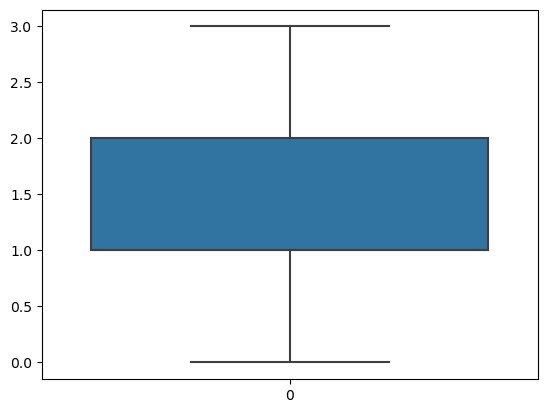

In [8]:
import seaborn as sns
sns.boxplot(df3['balance'])

In [9]:
cols=list(df3.select_dtypes(include='object'))
for i in cols:
    df3[i]=df3[i].astype('category')
    df3[i]=df3[i].cat.codes
df3=pd.get_dummies(df3,columns=cols,drop_first=True)
df3.head()

,age,balance,day,duration,campaign,pdays,previous,job_1,job_2,job_3,...,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_1,poutcome_2,poutcome_3,y_1
0,58,2,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,1,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,1,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,2,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
x=df3.drop('y_1',axis=1)
z=df3.y_1

In [12]:
#smote- synthetic minority over sampling techq
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=11)
x_over, y_over = sm.fit_resample(x,z)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,train_size=0.8,random_state=7)

In [14]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x_train=rs.fit_transform(x_train)
x_test=rs.transform(x_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

fit_knn=KNeighborsClassifier()
parm_dist={'n_neighbors':[5,7,9,11,13,15,17,19,21,23,25,27,29],
          'metric':['minkowski','manhattan']}
cv_knn=GridSearchCV(fit_knn,cv=20,param_grid=parm_dist)
cv_knn.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29]})

In [16]:
cv_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [18]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
y_pred=cv_knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      7926
           1       0.91      0.95      0.93      8043

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969



In [22]:
y_pred_train=cv_knn.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     31996
           1       0.93      0.97      0.95     31879

    accuracy                           0.95     63875
   macro avg       0.95      0.95      0.95     63875
weighted avg       0.95      0.95      0.95     63875



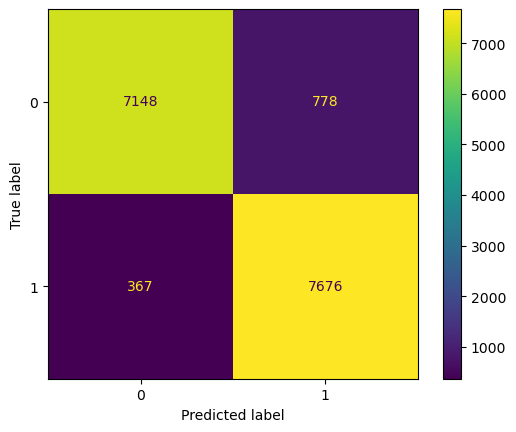

In [20]:
import matplotlib.pyplot as plt
conf_matrix=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()